# I-SEC Dataset Analysis

* **Author:** Patrik Goldschmidt (igoldschmidt@fit.vut.cz)
* **Project:** Network Intrusion Datasets: A Survey, Limitations, and Recommendations
* **Date:** 2024

Source: [https://gitlab.unige.ch/Benedetto.Serinelli/i-sec-dataset/](https://gitlab.unige.ch/Benedetto.Serinelli/i-sec-dataset/)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

pd.set_option('display.max_columns', None)

In [2]:
BASE_DIR = 'i-sec-dataset/'

In [3]:
# We clonned the whole repository as provided in the link above. List its contents
os.listdir(BASE_DIR)

['dos_fin.csv',
 'dos_scanning_attacks.csv',
 'scanning_nmap2.csv',
 'setup.py',
 'dos_sync.csv',
 'test.py',
 'no_correlated',
 'scanning_nmap3.csv',
 'training_script',
 'dos_rpau.csv',
 'scanning_nmap1.csv',
 '.git']

In [4]:
# Let's consider all CSV entries in the base directory. Load them.
data = pd.DataFrame()

for file in os.listdir(BASE_DIR):
    if file.endswith('.csv'):
        file_fullpath = os.path.join(BASE_DIR, file)

        data = pd.concat([data, pd.read_csv(file_fullpath)])

In [5]:
data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532944 entries, 0 to 893
Data columns (total 78 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Protocol           532944 non-null  int64  
 1   Flow.Duration      532944 non-null  int64  
 2   Tot.Fwd.Pkts       532944 non-null  int64  
 3   Tot.Bwd.Pkts       532944 non-null  int64  
 4   TotLen.Fwd.Pkts    532944 non-null  int64  
 5   TotLen.Bwd.Pkts    532944 non-null  int64  
 6   Fwd.Pkt.Len.Max    532944 non-null  int64  
 7   Fwd.Pkt.Len.Min    532944 non-null  int64  
 8   Fwd.Pkt.Len.Mean   532944 non-null  float64
 9   Fwd.Pkt.Len.Std    532944 non-null  float64
 10  Bwd.Pkt.Len.Max    532944 non-null  int64  
 11  Bwd.Pkt.Len.Min    532944 non-null  int64  
 12  Bwd.Pkt.Len.Mean   532944 non-null  float64
 13  Bwd.Pkt.Len.Std    532944 non-null  float64
 14  Flow.Byts.s        532940 non-null  float64
 15  Flow.Pkts.s        532944 non-null  float64
 16  Flow.

In [6]:
len(data)

532944

In [7]:
data['Label'].value_counts()

0    266472
1    264678
2      1794
Name: Label, dtype: int64

In [8]:
# Ok, so data are labeled only as 1/0, but attacks distinguished by files. Load them smartly to include the label
# Let's consider all CSV entries in the base directory. Load them.
data = pd.DataFrame()

for file in os.listdir(BASE_DIR):
    if file.endswith('.csv'):
        file_fullpath = os.path.join(BASE_DIR, file)
        data_partial = pd.read_csv(file_fullpath)

        # Rewrite the label to know which type of the attack is present
        attack_type = os.path.splitext(file)[0]
        data_partial['Label'] = data_partial['Label'].apply(lambda x : 'benign' if x == 0 else attack_type)

        data = pd.concat([data, data_partial])

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532944 entries, 0 to 893
Data columns (total 78 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Protocol           532944 non-null  int64  
 1   Flow.Duration      532944 non-null  int64  
 2   Tot.Fwd.Pkts       532944 non-null  int64  
 3   Tot.Bwd.Pkts       532944 non-null  int64  
 4   TotLen.Fwd.Pkts    532944 non-null  int64  
 5   TotLen.Bwd.Pkts    532944 non-null  int64  
 6   Fwd.Pkt.Len.Max    532944 non-null  int64  
 7   Fwd.Pkt.Len.Min    532944 non-null  int64  
 8   Fwd.Pkt.Len.Mean   532944 non-null  float64
 9   Fwd.Pkt.Len.Std    532944 non-null  float64
 10  Bwd.Pkt.Len.Max    532944 non-null  int64  
 11  Bwd.Pkt.Len.Min    532944 non-null  int64  
 12  Bwd.Pkt.Len.Mean   532944 non-null  float64
 13  Bwd.Pkt.Len.Std    532944 non-null  float64
 14  Flow.Byts.s        532940 non-null  float64
 15  Flow.Pkts.s        532944 non-null  float64
 16  Flow.

In [10]:
# Verify if the labels were loaded correctly
data['Label'].value_counts()

benign                  266472
dos_scanning_attacks    133236
dos_sync                 65574
dos_rpau                 64564
dos_fin                   1304
scanning_nmap3             909
scanning_nmap1             447
scanning_nmap2             438
Name: Label, dtype: int64

If desired, one could probably merge different nmap scanning classes together. In our table, we consider them as separate.

In [11]:
len(data)

532944

In [12]:
data.describe()

,Protocol,Flow.Duration,Tot.Fwd.Pkts,Tot.Bwd.Pkts,TotLen.Fwd.Pkts,TotLen.Bwd.Pkts,Fwd.Pkt.Len.Max,Fwd.Pkt.Len.Min,Fwd.Pkt.Len.Mean,Fwd.Pkt.Len.Std,Bwd.Pkt.Len.Max,Bwd.Pkt.Len.Min,Bwd.Pkt.Len.Mean,Bwd.Pkt.Len.Std,Flow.Byts.s,Flow.Pkts.s,Flow.IAT.Mean,Flow.IAT.Std,Flow.IAT.Max,Flow.IAT.Min,Fwd.IAT.Tot,Fwd.IAT.Mean,Fwd.IAT.Std,Fwd.IAT.Max,Fwd.IAT.Min,Bwd.IAT.Tot,Bwd.IAT.Mean,Bwd.IAT.Std,Bwd.IAT.Max,Bwd.IAT.Min,Fwd.PSH.Flags,Bwd.PSH.Flags,Fwd.URG.Flags,Bwd.URG.Flags,Fwd.Header.Len,Bwd.Header.Len,Fwd.Pkts.s,Bwd.Pkts.s,Pkt.Len.Min,Pkt.Len.Max,Pkt.Len.Mean,Pkt.Len.Std,Pkt.Len.Var,FIN.Flag.Cnt,SYN.Flag.Cnt,RST.Flag.Cnt,PSH.Flag.Cnt,ACK.Flag.Cnt,URG.Flag.Cnt,CWR.Flag.Count,ECE.Flag.Cnt,Down.Up.Ratio,Pkt.Size.Avg,Fwd.Seg.Size.Avg,Bwd.Seg.Size.Avg,Fwd.Byts.b.Avg,Fwd.Pkts.b.Avg,Fwd.Blk.Rate.Avg,Bwd.Byts.b.Avg,Bwd.Pkts.b.Avg,Bwd.Blk.Rate.Avg,Subflow.Fwd.Pkts,Subflow.Fwd.Byts,Subflow.Bwd.Pkts,Subflow.Bwd.Byts,Init.Fwd.Win.Byts,Init.Bwd.Win.Byts,Fwd.Act.Data.Pkts,Fwd.Seg.Size.Min,Active.Mean,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min
count,532944.000000,5.329440e+05,5.329440e+05,532944.000000,532944.000000,5.329440e+05,532944.000000,532944.000000,532944.000000,532944.000000,532944.000000,532944.000000,532944.000000,532944.000000,5.329400e+05,5.329440e+05,5.329440e+05,5.329440e+05,5.329440e+05,5.329440e+05,5.329440e+05,5.329440e+05,5.329440e+05,5.329440e+05,5.329440e+05,5.329440e+05,5.329440e+05,5.329440e+05,5.329440e+05,5.329440e+05,532944.000000,532944.0,532944.000000,532944.0,532944.000000,532944.000000,5.329440e+05,532944.000000,532944.000000,532944.000000,532944.000000,532944.000000,5.329440e+05,532944.000000,532944.000000,532944.000000,532944.000000,532944.000000,532944.000000,532944.000000,532944.000000,532944.000000,532944.000000,532944.000000,532944.000000,532944.0,532944.0,532944.0,532944.0,532944.000000,5.329440e+05,532944.000000,532944.000000,532944.000000,532944.000000,532944.000000,532944.000000,532944.000000,532944.000000,5.329440e+05,5.329440e+05,5.329440e+05,5.329440e+05,5.329440e+05,5.329440e+05,5.329440e+05,5.329440e+05
mean,6.053859,2.388773e+07,2.270934e+01,1.772802,2305.827926,3.127671e+02,1183.190328,718.038788,811.128150,208.023431,513.470958,364.041817,438.659791,105.534441,3.282092e+05,inf,1.232620e+07,3.042330e+06,1.570396e+07,1.023747e+07,2.388630e+07,1.552116e+07,2.084617e+05,1.570341e+07,1.536820e+07,8.802594e+06,5.161213e+06,3.576745e+04,5.187550e+06,5.135944e+06,0.242070,0.0,0.241872,0.0,89.986265,35.307049,1.380951e+03,561.610432,354.036439,1183.562843,642.479072,361.793433,2.094801e+05,0.005074,0.671857,1.759055,1.087353,1.400447,0.587461,0.000019,0.496960,0.255481,846.787004,811.128150,74.825752,0.0,0.0,0.0,0.0,0.124861,7.070460e+01,2.760827,1002.608454,0.995140,149.243737,32861.712499,16293.238517,1.317857,19.953751,1.048219e+04,3.441781e+03,1.380291e+04,7.695870e+03,4.840370e+14,1.181987e+14,5.675994e+14,4.003649e+14
std,0.801484,2.849712e+07,5.667626e+03,38.362684,1596.773703,6.988489e+04,286.865070,729.057050,637.700077,209.121798,559.724252,631.401915,591.716909,107.345801,4.582538e+05,NaN,1.747541e+07,4.980211e+06,1.776047e+07,1.810355e+07,2.849712e+07,1.757613e+07,7.008342e+05,1.776070e+07,1.742369e+07,1.610831e+07,9.037743e+06,1.690593e+05,9.083442e+06,8.995035e+06,0.428337,0.0,0.428217,0.0,1007.159335,761.734580,5.555474e+03,1237.923341,624.955770,286.901757,542.756043,280.331522,2.407913e+05,0.071049,1.194419,0.934914,0.921321,56.578627,1.068063,0.009686,0.500066,0.436197,783.141642,637.700077,77.083553,0.0,0.0,0.0,0.0,40.954640,1.257792e+04,2.339343,286.323690,1.020165,152.753168,32509.722640,16390.463119,10.205772,1.088517,2.378433e+05,1.200731e+05,3.286704e+05,1.853901e+05,6.916285e+14,3.473929e+14,7.697158e+14,6.963169e+14
min,0.000000,0.000000e+00,1.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,2.645804e-02,0.000000e+00,0.000000e+00,0.000000e+00,-1.810000e+02,0.000000e+00,0.000000e+00,0.

In [13]:
data.head()

,Protocol,Flow.Duration,Tot.Fwd.Pkts,Tot.Bwd.Pkts,TotLen.Fwd.Pkts,TotLen.Bwd.Pkts,Fwd.Pkt.Len.Max,Fwd.Pkt.Len.Min,Fwd.Pkt.Len.Mean,Fwd.Pkt.Len.Std,Bwd.Pkt.Len.Max,Bwd.Pkt.Len.Min,Bwd.Pkt.Len.Mean,Bwd.Pkt.Len.Std,Flow.Byts.s,Flow.Pkts.s,Flow.IAT.Mean,Flow.IAT.Std,Flow.IAT.Max,Flow.IAT.Min,Fwd.IAT.Tot,Fwd.IAT.Mean,Fwd.IAT.Std,Fwd.IAT.Max,Fwd.IAT.Min,Bwd.IAT.Tot,Bwd.IAT.Mean,Bwd.IAT.Std,Bwd.IAT.Max,Bwd.IAT.Min,Fwd.PSH.Flags,Bwd.PSH.Flags,Fwd.URG.Flags,Bwd.URG.Flags,Fwd.Header.Len,Bwd.Header.Len,Fwd.Pkts.s,Bwd.Pkts.s,Pkt.Len.Min,Pkt.Len.Max,Pkt.Len.Mean,Pkt.Len.Std,Pkt.Len.Var,FIN.Flag.Cnt,SYN.Flag.Cnt,RST.Flag.Cnt,PSH.Flag.Cnt,ACK.Flag.Cnt,URG.Flag.Cnt,CWR.Flag.Count,ECE.Flag.Cnt,Down.Up.Ratio,Pkt.Size.Avg,Fwd.Seg.Size.Avg,Bwd.Seg.Size.Avg,Fwd.Byts.b.Avg,Fwd.Pkts.b.Avg,Fwd.Blk.Rate.Avg,Bwd.Byts.b.Avg,Bwd.Pkts.b.Avg,Bwd.Blk.Rate.Avg,Subflow.Fwd.Pkts,Subflow.Fwd.Byts,Subflow.Bwd.Pkts,Subflow.Bwd.Byts,Init.Fwd.Win.Byts,Init.Bwd.Win.Byts,Fwd.Act.Data.Pkts,Fwd.Seg.Size.Min,Active.Mean,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,Label
0,6,1486,5,2,935,325,935,0,187.0,418.144712,325,0,162.5,229.809704,847913.86270,4710.632571,247.666667,282.455424,694,3,1486,371.50,496.607491,1068,3,694,694.0,0.0,694,694,0,0,0,0,124,40,3364.737550,1345.895020,0,935,157.500,334.108622,111628.5714,0,0,1,1,0,0,0,1,0.0,180.000000,187.0,162.5,0,0,0,0,0,0,5,935,2,325,65535,32768,1,20,0.0,0.0,0,0,0.0,0.0,0.0,0.0,benign
1,6,16518,5,2,935,259,935,0,187.0,418.144712,259,0,129.5,183.140656,72284.78024,423.780119,2753.000000,6446.971444,15910,7,16518,4129.50,8067.116895,16229,8,15910,15910.0,0.0,15910,15910,0,0,0,0,124,40,302.700085,121.080034,0,935,149.250,330.173439,109014.5000,0,0,1,1,0,0,0,1,0.0,170.571429,187.0,129.5,0,0,0,0,0,0,5,935,2,259,65535,32768,1,20,0.0,0.0,0,0,0.0,0.0,0.0,0.0,benign
2,6,18809,5,2,935,336,935,0,187.0,418.144712,336,0,168.0,237.587878,67574.03371,372.162263,3134.833333,7413.024630,18265,7,18809,4702.25,9225.555679,18540,10,18265,18265.0,0.0,18265,18265,0,0,0,0,124,40,265.830188,106.332075,0,935,158.875,334.918087,112170.1250,0,0,1,1,0,0,0,1,0.0,181.571429,187.0,168.0,0,0,0,0,0,0,5,935,2,336,65535,32768,1,20,0.0,0.0,0,0,0.0,0.0,0.0,0.0,benign
3,6,1343,5,2,935,247,935,0,187.0,418.144712,247,0,123.5,174.655375,880119.13630,5212.211467,223.833333,287.187337,743,7,1343,335.75,496.816784,1062,8,743,743.0,0.0,743,743,0,0,0,0,124,40,3723.008191,1489.203276,0,935,147.750,329.630421,108656.2143,0,0,1,1,0,0,0,1,0.0,168.857143,187.0,123.5,0,0,0,0,0,0,5,935,2,247,65535,32768,1,20,0.0,0.0,0,0,0.0,0.0,0.0,0.0,benign
4,6,1267,5,2,935,267,935,0,187.0,418.144712,267,0,133.5,188.797511,948697.71110,5524.861878,211.166667,273.771742,710,6,1267,316.75,474.980263,1014,6,710,710.0,0.0,710,710,0,0,0,0,124,40,3946.329913,1578.531965,0,935,150.250,330.565209,109273.3571,0,0,1,1,0,0,0,1,0.0,171.714286,187.0,133.5,0,0,0,0,0,0,5,935,2,267,65535,32768,1,20,0.0,0.0,0,0,0.0,0.0,0.0,0.0,benign


In [14]:
# Protocol breakdown
data['Protocol'].value_counts()

6     529908
17      2760
0        276
Name: Protocol, dtype: int64

<AxesSubplot:>

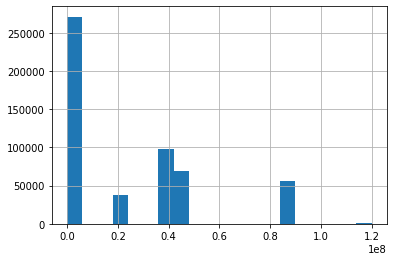

In [15]:
# Flow duration historgram
data['Flow.Duration'].hist(bins=20)

Apparently, there are no timestamps nor any identifiers in the dataset., so temporal analysis cannot be performed.